<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Data_Preparation_of_CSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Package

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


Import and write Necessary Libraies and Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from category_encoders.target_encoder import TargetEncoder

In [ ]:
#Function to Visualize Features

def plot_numeric(cols):
    n_features = len(cols)
    ncols = 3
    nrows = (n_features + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_categorical(cols):
    n_features = len(cols)
    ncols = 3
    nrows = (n_features + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        order = df[col].value_counts().index if df[col].nunique() < 10 else sorted(df[col].unique())
        sns.countplot(data=df, x=col, hue=col, order=order, ax=axes[i], palette="Set2", legend=False)
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        if df[col].nunique() > 5:
            plt.setp(axes[i].get_xticklabels(), rotation=30, ha='right')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/Customer_support_data.csv")
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.shape

(85907, 20)

In [ ]:
df.isna().sum()

,0
category,0
Sub-category,0
Agent_name,0
Supervisor,0
CSAT Score,0
Issue_reported_at_hour,0
Email,0
Inbound,0
Outcall,0
Emily Chen,0


In [ ]:
df.duplicated().sum()

np.int64(10975)

Basic cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channel_name          85907 non-null  object
 1   category              85907 non-null  object
 2   Sub-category          85907 non-null  object
 3   Issue_reported at     85907 non-null  object
 4   issue_responded       85907 non-null  object
 5   Survey_response_Date  85907 non-null  object
 6   Agent_name            85907 non-null  object
 7   Supervisor            85907 non-null  object
 8   Manager               85907 non-null  object
 9   Tenure Bucket         85907 non-null  object
 10  Agent Shift           85907 non-null  object
 11  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.9+ MB


In [ ]:
df.drop(columns=['Unique id','Order_id','order_date_time','Customer Remarks','Product_category','Item_price','connected_handling_time','Customer_City'],inplace=True)

In [ ]:
df.nunique()

,0
channel_name,3
category,12
Sub-category,57
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31
Agent_name,1371
Supervisor,40
Manager,6
Tenure Bucket,5


Formatting date

In [ ]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y')

In [ ]:
print('Min Datetime        | Max Datetime')
print(df['Issue_reported at'].min(),'|',df['Issue_reported at'].max())
print(df['issue_responded'].min(),'|',df['issue_responded'].max())
print(df['Survey_response_Date'].min(),'|',df['Survey_response_Date'].max())

Min Datetime        | Max Datetime
2023-07-28 20:42:00 | 2023-08-31 23:58:00
2023-08-01 00:00:00 | 2023-08-31 23:59:00
2023-08-01 00:00:00 | 2023-08-31 00:00:00


Feature Visualization

In [ ]:
sns.set(style="whitegrid")

numeric_cols = df.select_dtypes(include=['number']).drop(columns=['CSAT Score'], errors='ignore').columns
categorical_cols = df.select_dtypes(include=['object']).columns

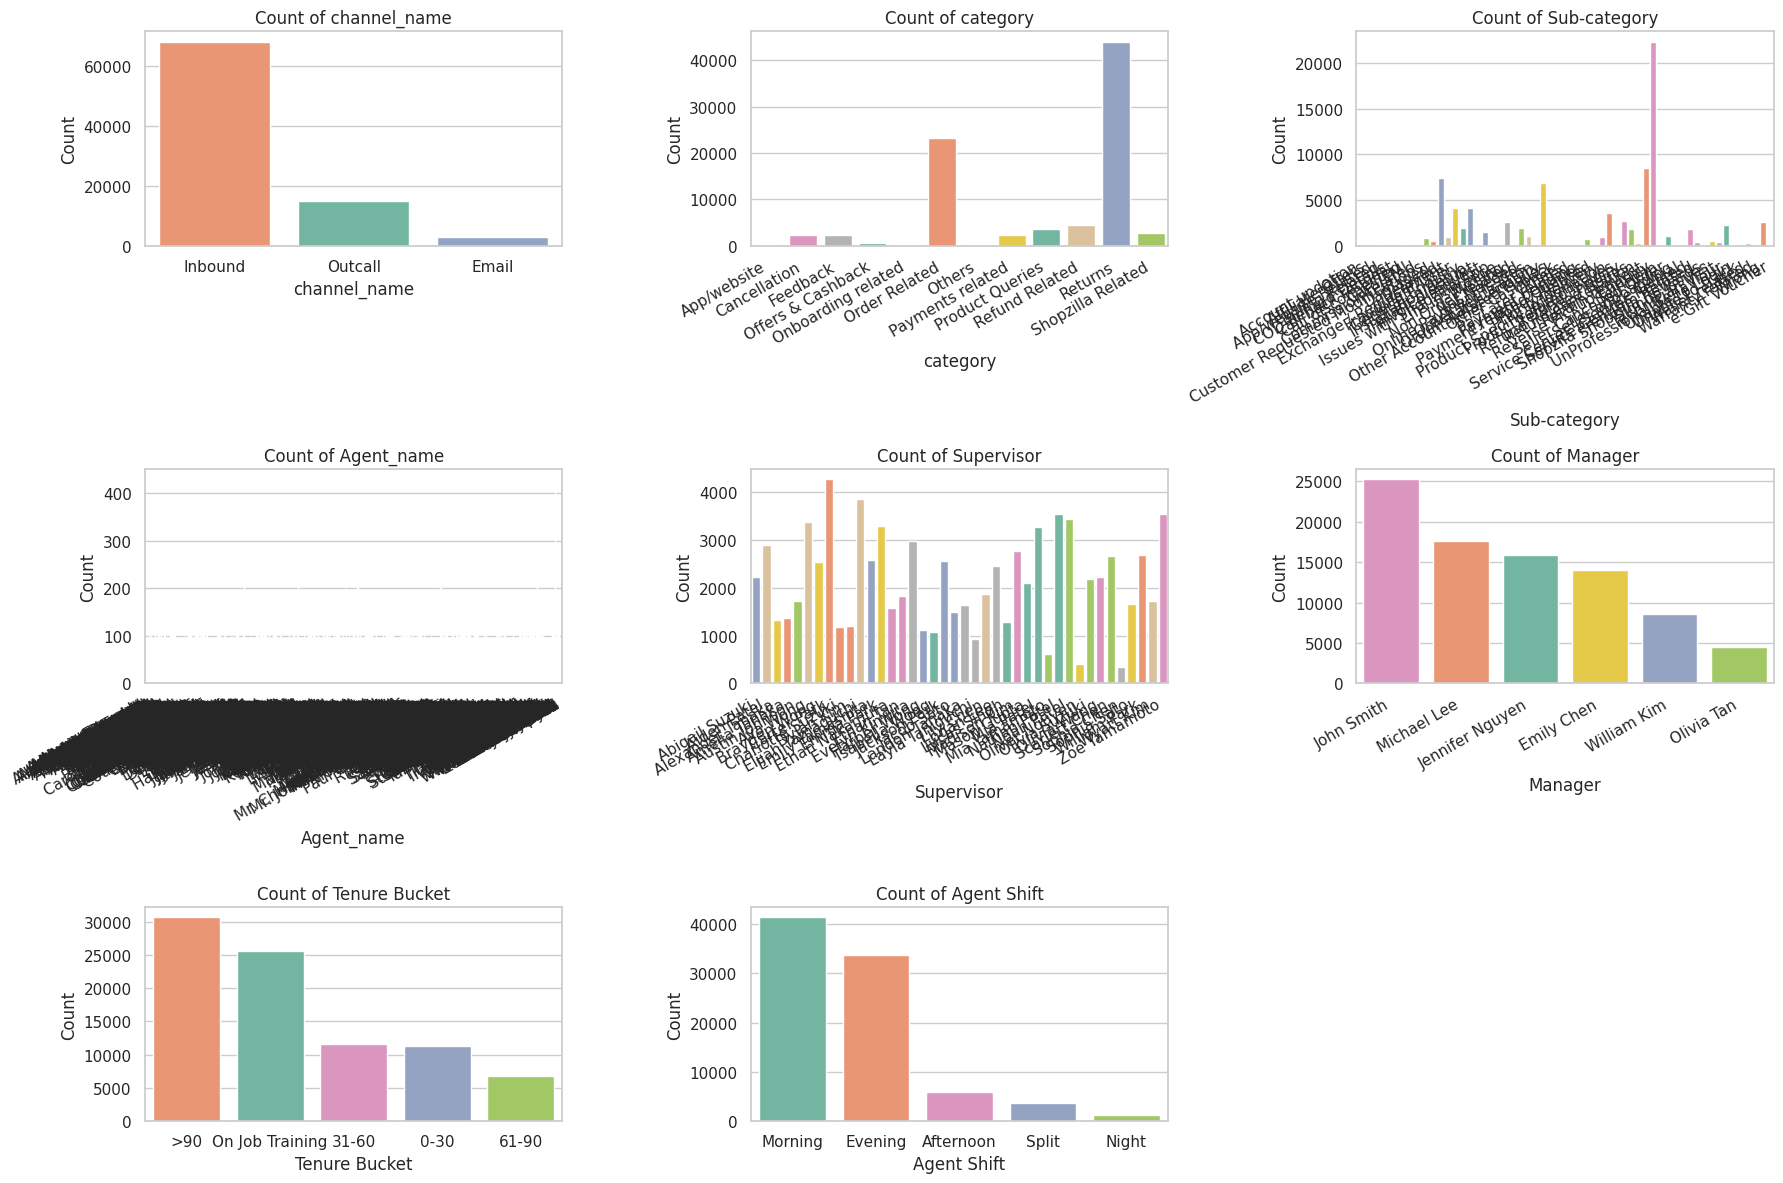

In [ ]:
plot_categorical(categorical_cols)

Now, we can consider dropping those columns which don't show variability.

Feature Engineering

In [ ]:
df['Issue_reported_at_hour'] = df['Issue_reported at'].dt.hour
df['issue_responded_hour'] = df['issue_responded'].dt.hour

In [ ]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported_at_hour,issue_responded_hour
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,11,11
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,12,12
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,20,20
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20,21
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,10,10


Encoding

In [ ]:
# channel_name, Manager, Tenure Bucket, Agent Shift
df_channel = pd.get_dummies(df['channel_name'],dtype=int)
df_manager = pd.get_dummies(df['Manager'],dtype=int)
df_tenure = pd.get_dummies(df['Tenure Bucket'],dtype=int)
df_agent = pd.get_dummies(df['Agent Shift'],dtype=int)

In [ ]:
df = pd.concat([df,df_channel,df_manager,df_tenure,df_agent],axis=1)

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'Issue_reported_at_hour', 'issue_responded_hour', 'Email', 'Inbound',
       'Outcall', 'Emily Chen', 'Jennifer Nguyen', 'John Smith', 'Michael Lee',
       'Olivia Tan', 'William Kim', '0-30', '31-60', '61-90', '>90',
       'On Job Training', 'Afternoon', 'Evening', 'Morning', 'Night', 'Split'],
      dtype='object')

In [ ]:
df.drop(columns=['channel_name','Manager', 'Tenure Bucket', 'Agent Shift','Issue_reported at','issue_responded','Survey_response_Date'],inplace=True)

In [ ]:
columns=['category','Sub-category','Agent_name','Supervisor']
for i in columns:
    scaler = TargetEncoder()
    df[i]=scaler.fit_transform(X=df[i],y=df['CSAT Score'])
df.head()

,category,Sub-category,Agent_name,Supervisor,CSAT Score,Issue_reported_at_hour,issue_responded_hour,Email,Inbound,Outcall,...,0-30,31-60,61-90,>90,On Job Training,Afternoon,Evening,Morning,Night,Split
0,4.039816,4.252906,4.281369,4.170223,5,11,11,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,4.039816,4.044023,4.512365,4.070175,5,12,12,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,4.096059,3.883139,4.464643,4.196033,5,20,20,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.346350,4.189468,3.994242,4.326467,5,20,21,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,3.990506,3.921875,4.032264,4.116077,5,10,10,0,1,0,...,1,0,0,0,0,0,0,1,0,0


Linearity Check

In [ ]:
from scipy.stats import pearsonr
'''
Ho = There is no Linearity between Dependent and Independent Variables
Ha = There is Linearity between Dependent and Independent Variables
'''
alpha=0.05
for i in df.columns:
    pstat,pvalue=pearsonr(df[i],df['CSAT Score'])
    if pvalue<alpha:
        continue
    else:
        print(i,':Need to Drop')
        df.drop(columns=i,inplace=True)

issue_responded_hour :Need to Drop
Michael Lee :Need to Drop
0-30 :Need to Drop
Night :Need to Drop


This are the columns that don't have linearity with target field, so we drop it.

Multi-collinearity Check

In [ ]:
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns='CSAT Score',axis=1)
y = df['CSAT Score']
threshold = 10
default_vif = float('inf')
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
while True:
    # Check if any VIF score is NaN (which will be caused by division by zero)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    # Handle division by zero
    vif_data.loc[vif_data['VIF'] == np.inf, 'VIF'] = default_vif

    high_vif_features = vif_data[vif_data["VIF"] > threshold]
    if high_vif_features.empty:
        break
    else:
        feature_to_drop = high_vif_features.iloc[0]['Feature']
        X = X.drop(columns=[feature_to_drop])
        print("Dropped column:", feature_to_drop)

Dropped column: Email
Dropped column: category
Dropped column: Sub-category
Dropped column: Agent_name
Dropped column: Supervisor
Dropped column: Issue_reported_at_hour
Dropped column: Inbound
Dropped column: Jennifer Nguyen


In [ ]:
df

,category,Sub-category,Agent_name,Supervisor,CSAT Score,Issue_reported_at_hour,Email,Inbound,Outcall,Emily Chen,...,Olivia Tan,William Kim,31-60,61-90,>90,On Job Training,Afternoon,Evening,Morning,Split
0,4.039816,4.252906,4.281369,4.170223,5,11,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,4.039816,4.044023,4.512365,4.070175,5,12,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,4.096059,3.883139,4.464643,4.196033,5,20,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,4.346350,4.189468,3.994242,4.326467,5,20,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.990506,3.921875,4.032264,4.116077,5,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,4.226813,4.296811,4.015630,4.174222,4,23,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
85903,4.096059,3.584514,4.571985,4.297321,5,8,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
85904,4.096059,4.210344,3.987871,4.292531,5,18,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
85905,4.158675,4.158675,3.935325,4.172823,4,19,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


Linearity Check/ Multi-colinearity Check using these mentioned methods sometimes aggressive and can leads to the biased outcomes, particularly for small dataset. In this case, consider correlation heatmap graph to identify highly correlated features.

In [ ]:
corr_matrix = df.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

In [ ]:
df.to_csv("Processed_CSR.csv", index=False)